# Laboratorium 1


### Konfiguracja

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
from decimal import Decimal

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [7]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        plt.close()
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


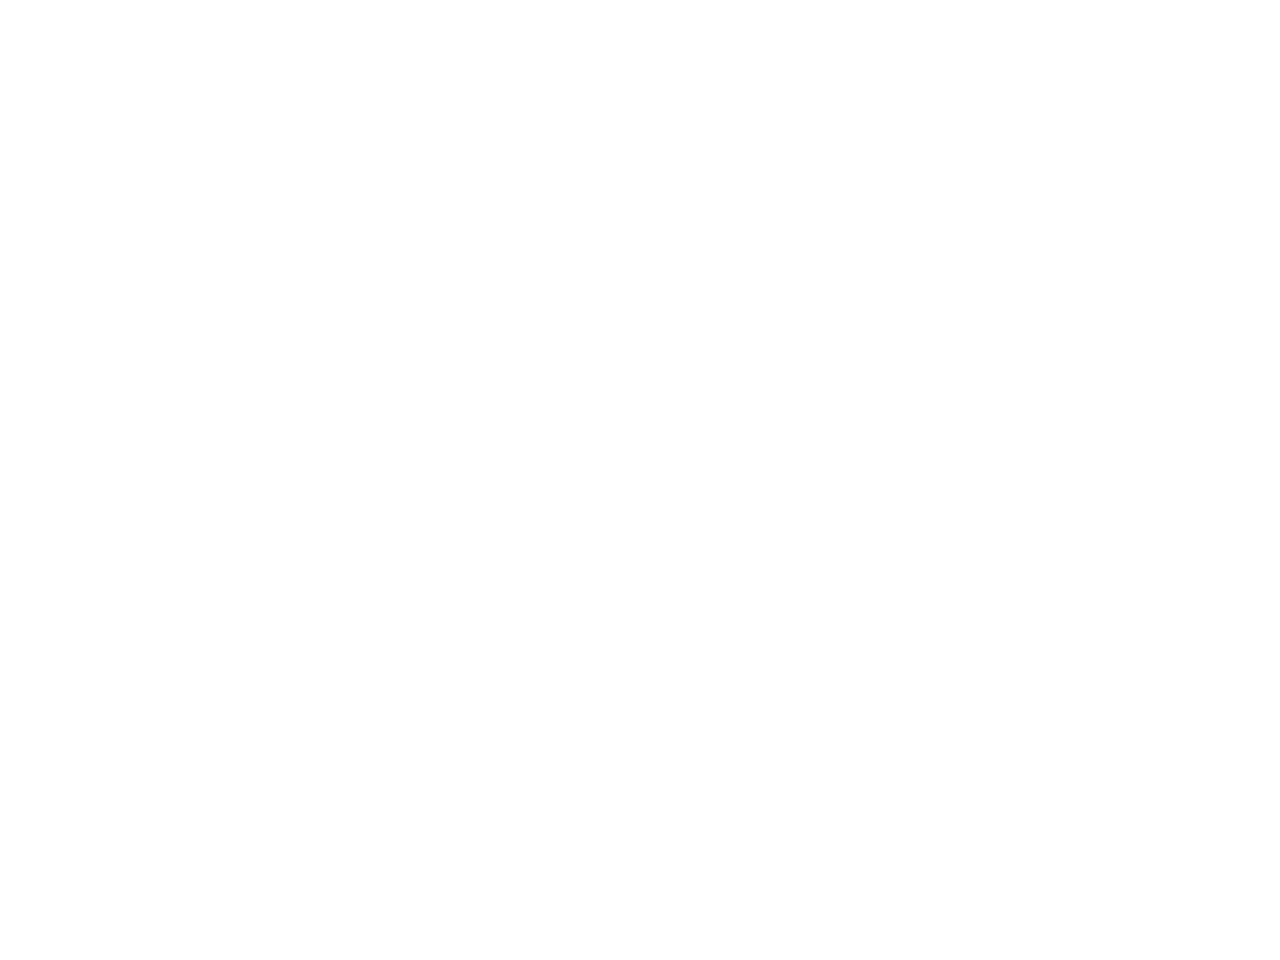

In [3]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

<IPython.core.display.Javascript object>


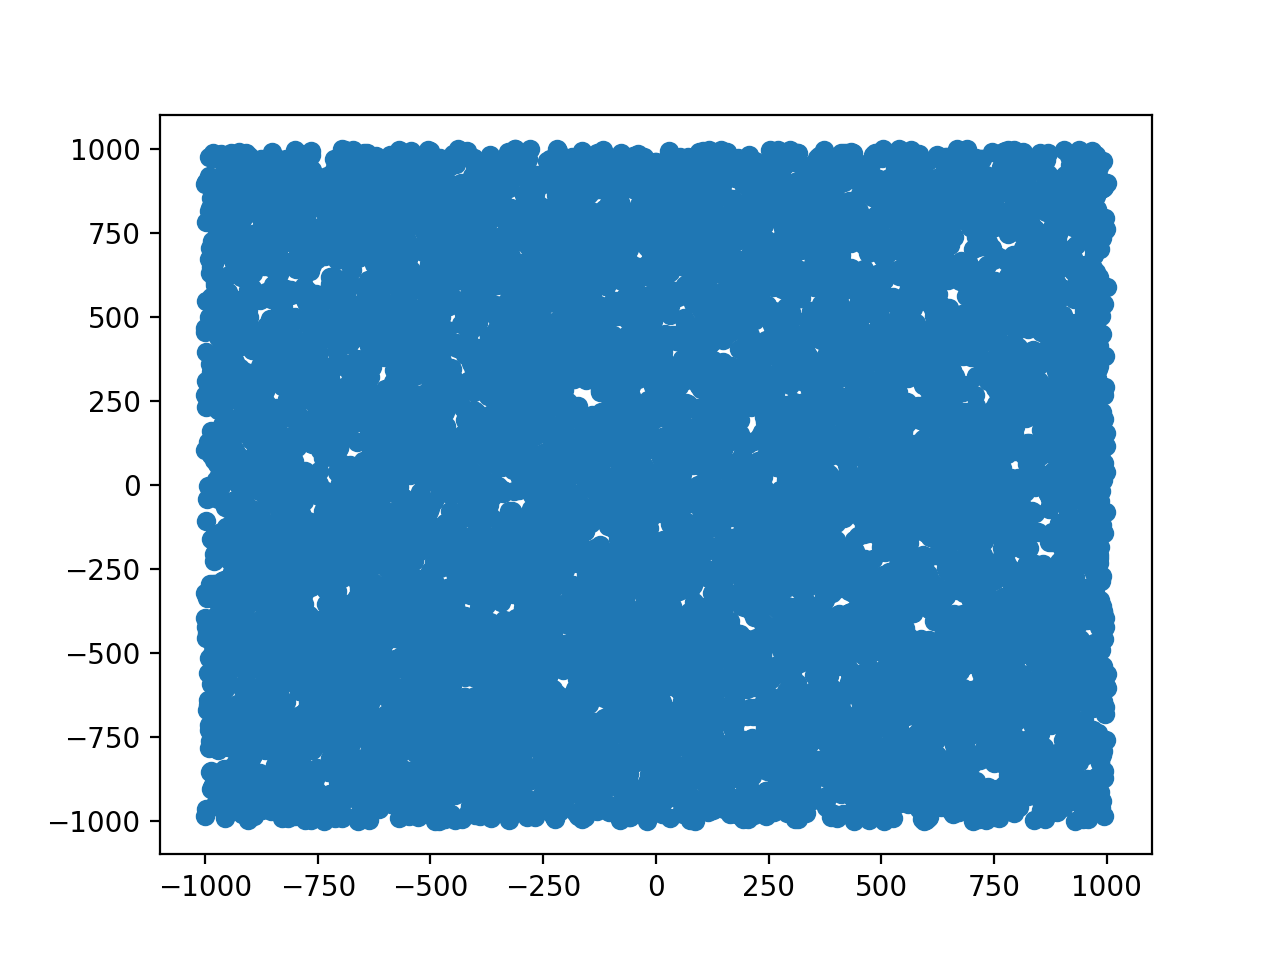

In [10]:
#a
%matplotlib notebook
import random

PointsA = []
for x in range(10000):
    PointsA.append((random.uniform(-1000,1000),random.uniform(-1000, 1000)))
    
plot = Plot([PointsCollection(PointsA)])
plot.draw()

<IPython.core.display.Javascript object>


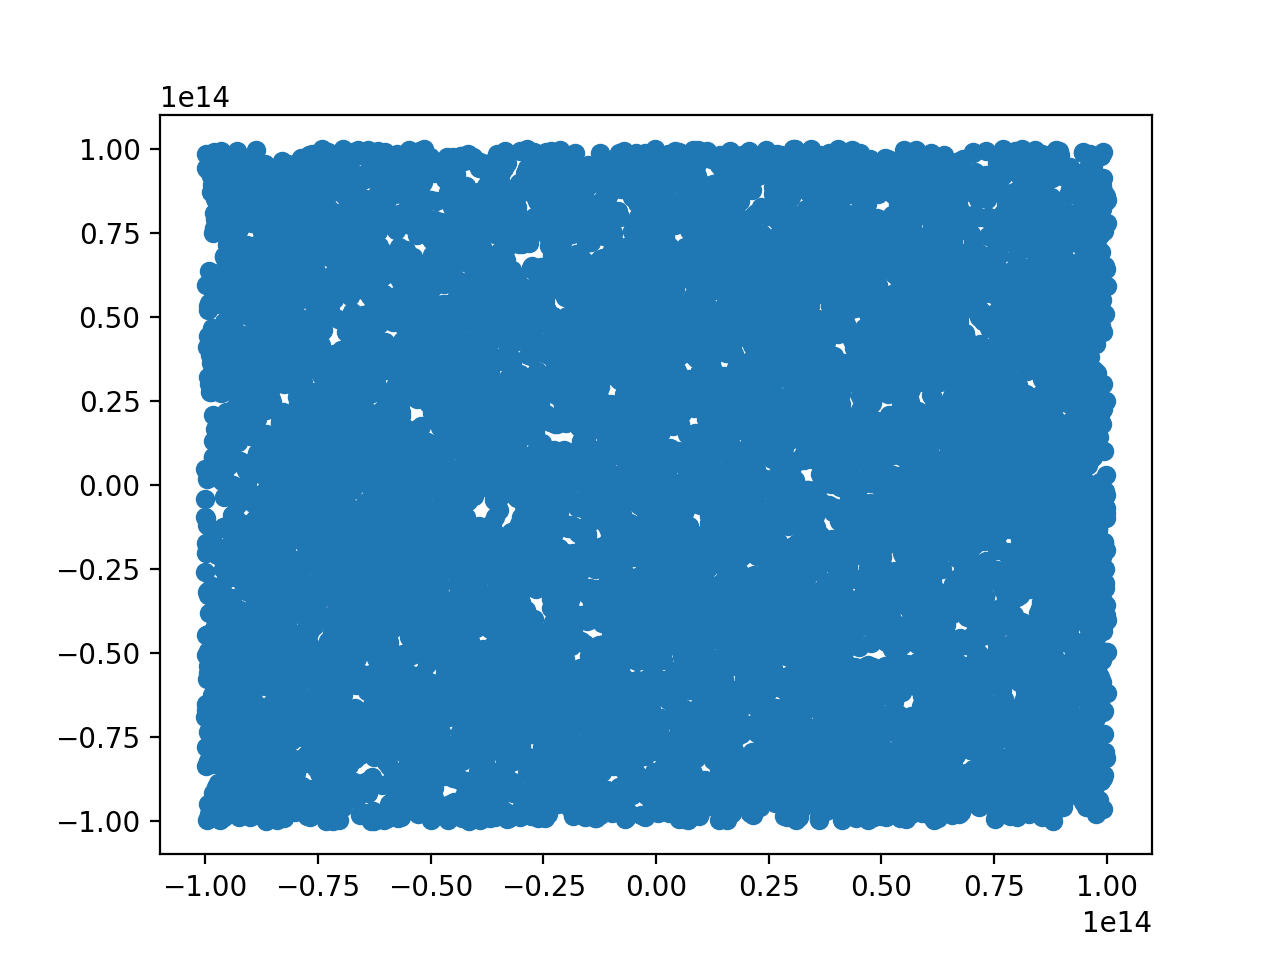

In [26]:
#b
%matplotlib notebook
import random

PointsB = []
for x in range(10000):
    PointsB.append((random.uniform(-1e14,1e14),random.uniform(-1e14, 1e14)))
    
plot = Plot([PointsCollection(PointsB)])
plot.draw()

<IPython.core.display.Javascript object>


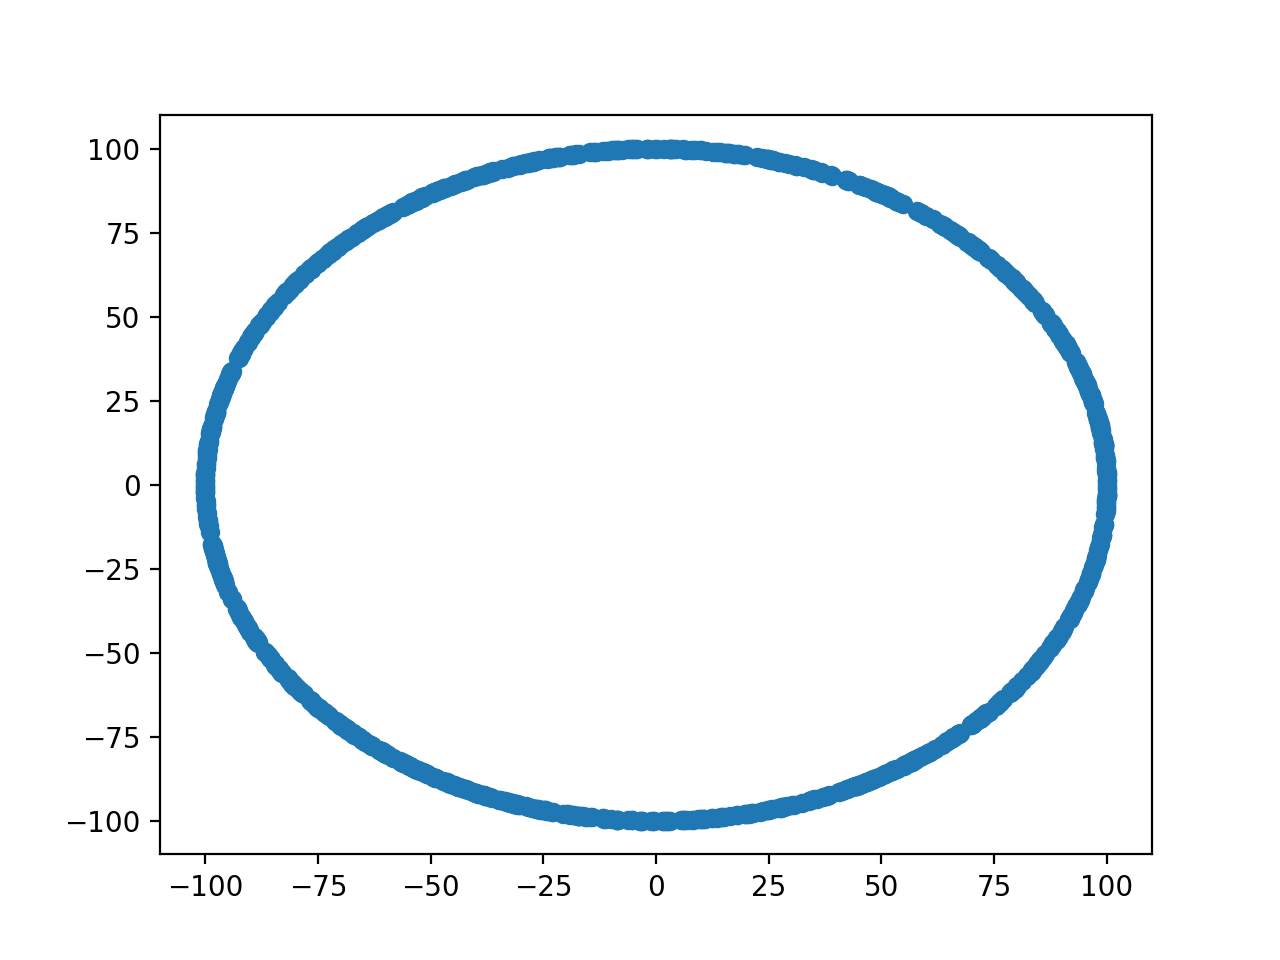

In [9]:
#c
import math
%matplotlib notebook

Circle = []
    
for x in range(1000):
    t = random.uniform(0, 2*math.pi)
    Circle.append(( 100*math.cos(t), 100*math.sin(t) ))
    
plot = Plot([PointsCollection(Circle)])
plot.draw()

<IPython.core.display.Javascript object>


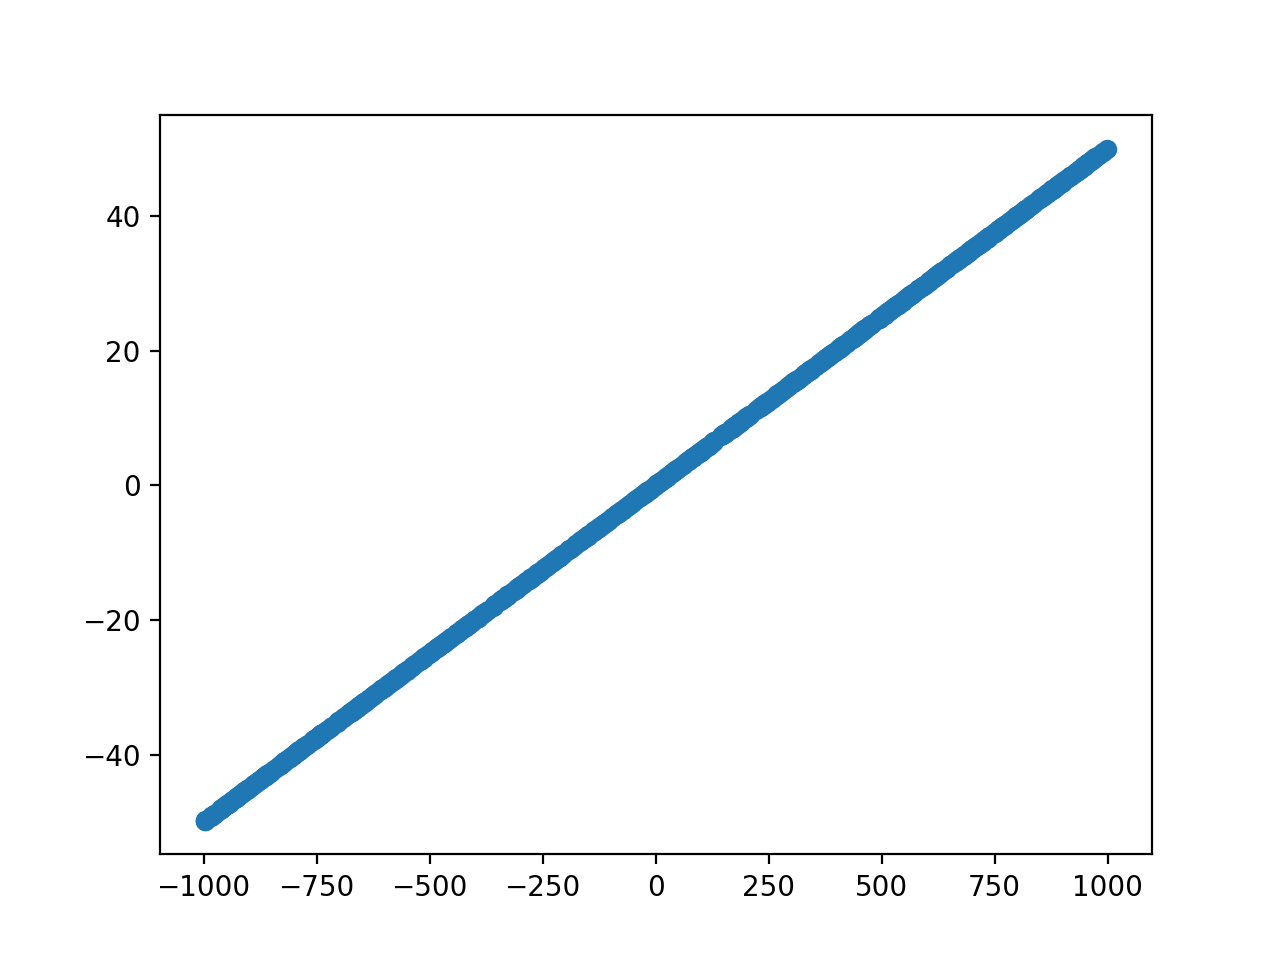

In [11]:
#d
%matplotlib notebook

Line = []

for i in range(1000):
    x = random.uniform(-1000, 1000)
    Line.append((x, 0.05*x+0.05))

    
plot = Plot([PointsCollection(Line)])
plot.draw()


In [2]:
#3
a_x = -1.0
a_y = 0.0
b_x = 1.0
b_y = 0.1

def det3x3BuiltIn (a_x, a_y, b_x, b_y, c_x, c_y):
    d = np.array([[a_x, a_y, 1],
                 [b_x, b_y, 1],
                 [c_x, c_y, 1]])
    return np.linalg.det(d)

def det2x2BuiltIn (a_x, a_y, b_x, b_y, c_x, c_y):
    d = np.array([[a_x-c_x, a_y-c_y], 
                  [b_x-c_x, b_y-c_y]])
    return np.linalg.det(d)

def det3x3Mine (a_x, a_y, b_x, b_y, c_x, c_y):
    det = a_x*b_y + b_x*c_y + c_x*a_y - c_x*b_y - b_x*a_y - a_x*c_y
    return det

def det2x2Mine (a_x, a_y, b_x, b_y, c_x, c_y):
    det = (a_x-c_x)*(b_y-c_y) - (b_x-c_x)*(a_y-c_y)
    return det


In [3]:
def resultPrep(results):   #list of lists of results
    for i in range(4):   
        pos = []
        for j in range(3):
            records = []
            pos.append(records)
        results.append(pos)
    return results

detChoice = [det3x3BuiltIn,     # list of different functions calc. determinant
             det3x3Mine, 
             det2x2BuiltIn,
             det2x2Mine]  
 
def calcPositions(res, acc, ChosenFigure):
    results = resultPrep(res)
    for p in ChosenFigure:
        for i in range(4):
            det = detChoice[i](a_x, a_y, b_x, b_y, p[0], p[1])
            if det - acc > 0:
                results[i][1].append(p)
               
            elif det + acc < 0:
                results[i][0].append(p)
                
            elif det -acc < 0 and det + acc > 0:
                results[i][2].append(p)
            else:
                continue
    return results

def calcToCompare(results, Figure, acc):            
    res = calcPositions(results, acc, Figure)
    comparison = []
    for i in range(4):
        t = []
        for j in range(3):
            t.append(len(res[i][j]))
        comparison.append(t)
    return comparison

def dataComparison(Figure, acc):
    for i in range(8):
        results = []
        acc = acc*1e-1
        comparison = calcToCompare(results, Figure, acc)
        dets = ["3x3 B", "3x3 M", "2x2 B", "2x2 M"]
        print("\u03B5 = ", '%.0E' % Decimal(acc))
        for i in range(4):
             print(dets[i], "  L: ", comparison[i][0], " R: ", comparison[i][1], " In: ", comparison[i][2])
        print( "---" )

    
def drawComparison(Figure, acc, indexOfMethod):
    i = indexOfMethod
    res = []
    res = resultPrep(res)
    results = calcPositions(res, acc, Figure)
    plot = Plot([PointsCollection(results[i][0], color = 'green'),
            PointsCollection(results[i][1], color = 'blue'), 
            PointsCollection(results[i][2], color = 'red')])
    plot.draw()
    

In [30]:
dataComparison(PointsA, 1e2)

ε =  1E+01
3x3 B   L:  4980  R:  4973  In:  47
3x3 M   L:  4980  R:  4973  In:  47
2x2 B   L:  4980  R:  4973  In:  47
2x2 M   L:  4980  R:  4973  In:  47
---
ε =  1E+00
3x3 B   L:  5000  R:  4992  In:  8
3x3 M   L:  5000  R:  4992  In:  8
2x2 B   L:  5000  R:  4992  In:  8
2x2 M   L:  5000  R:  4992  In:  8
---
ε =  1E-01
3x3 B   L:  5003  R:  4994  In:  3
3x3 M   L:  5003  R:  4994  In:  3
2x2 B   L:  5003  R:  4994  In:  3
2x2 M   L:  5003  R:  4994  In:  3
---
ε =  1E-02
3x3 B   L:  5005  R:  4995  In:  0
3x3 M   L:  5005  R:  4995  In:  0
2x2 B   L:  5005  R:  4995  In:  0
2x2 M   L:  5005  R:  4995  In:  0
---
ε =  1E-03
3x3 B   L:  5005  R:  4995  In:  0
3x3 M   L:  5005  R:  4995  In:  0
2x2 B   L:  5005  R:  4995  In:  0
2x2 M   L:  5005  R:  4995  In:  0
---
ε =  1E-04
3x3 B   L:  5005  R:  4995  In:  0
3x3 M   L:  5005  R:  4995  In:  0
2x2 B   L:  5005  R:  4995  In:  0
2x2 M   L:  5005  R:  4995  In:  0
---
ε =  1E-05
3x3 B   L:  5005  R:  4995  In:  0
3x3 M   L:  5005  R:

<IPython.core.display.Javascript object>


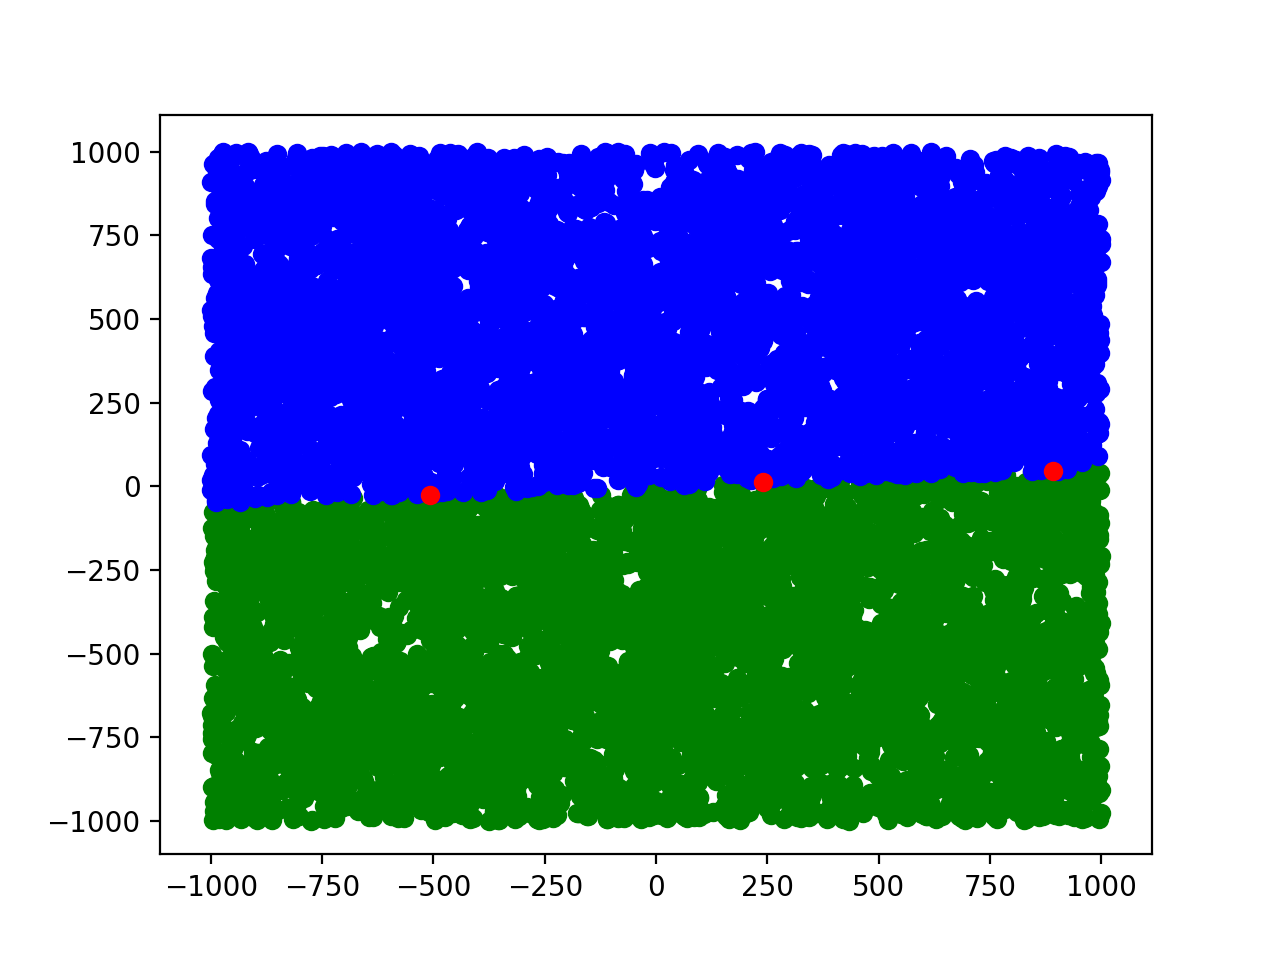

In [31]:
drawComparison(PointsA, 1e-1, 2)

In [41]:
dataComparison(PointsB, 1e2)

ε =  1E+01
3x3 B   L:  5042  R:  4958  In:  0
3x3 M   L:  5042  R:  4958  In:  0
2x2 B   L:  5042  R:  4958  In:  0
2x2 M   L:  5041  R:  4958  In:  1
---
ε =  1E+00
3x3 B   L:  5042  R:  4958  In:  0
3x3 M   L:  5042  R:  4958  In:  0
2x2 B   L:  5042  R:  4958  In:  0
2x2 M   L:  5041  R:  4958  In:  1
---
ε =  1E-01
3x3 B   L:  5042  R:  4958  In:  0
3x3 M   L:  5042  R:  4958  In:  0
2x2 B   L:  5042  R:  4958  In:  0
2x2 M   L:  5041  R:  4958  In:  1
---
ε =  1E-02
3x3 B   L:  5042  R:  4958  In:  0
3x3 M   L:  5042  R:  4958  In:  0
2x2 B   L:  5042  R:  4958  In:  0
2x2 M   L:  5041  R:  4958  In:  1
---
ε =  1E-03
3x3 B   L:  5042  R:  4958  In:  0
3x3 M   L:  5042  R:  4958  In:  0
2x2 B   L:  5042  R:  4958  In:  0
2x2 M   L:  5041  R:  4958  In:  1
---
ε =  1E-04
3x3 B   L:  5042  R:  4958  In:  0
3x3 M   L:  5042  R:  4958  In:  0
2x2 B   L:  5042  R:  4958  In:  0
2x2 M   L:  5041  R:  4958  In:  1
---
ε =  1E-05
3x3 B   L:  5042  R:  4958  In:  0
3x3 M   L:  5042  R:  49

<IPython.core.display.Javascript object>


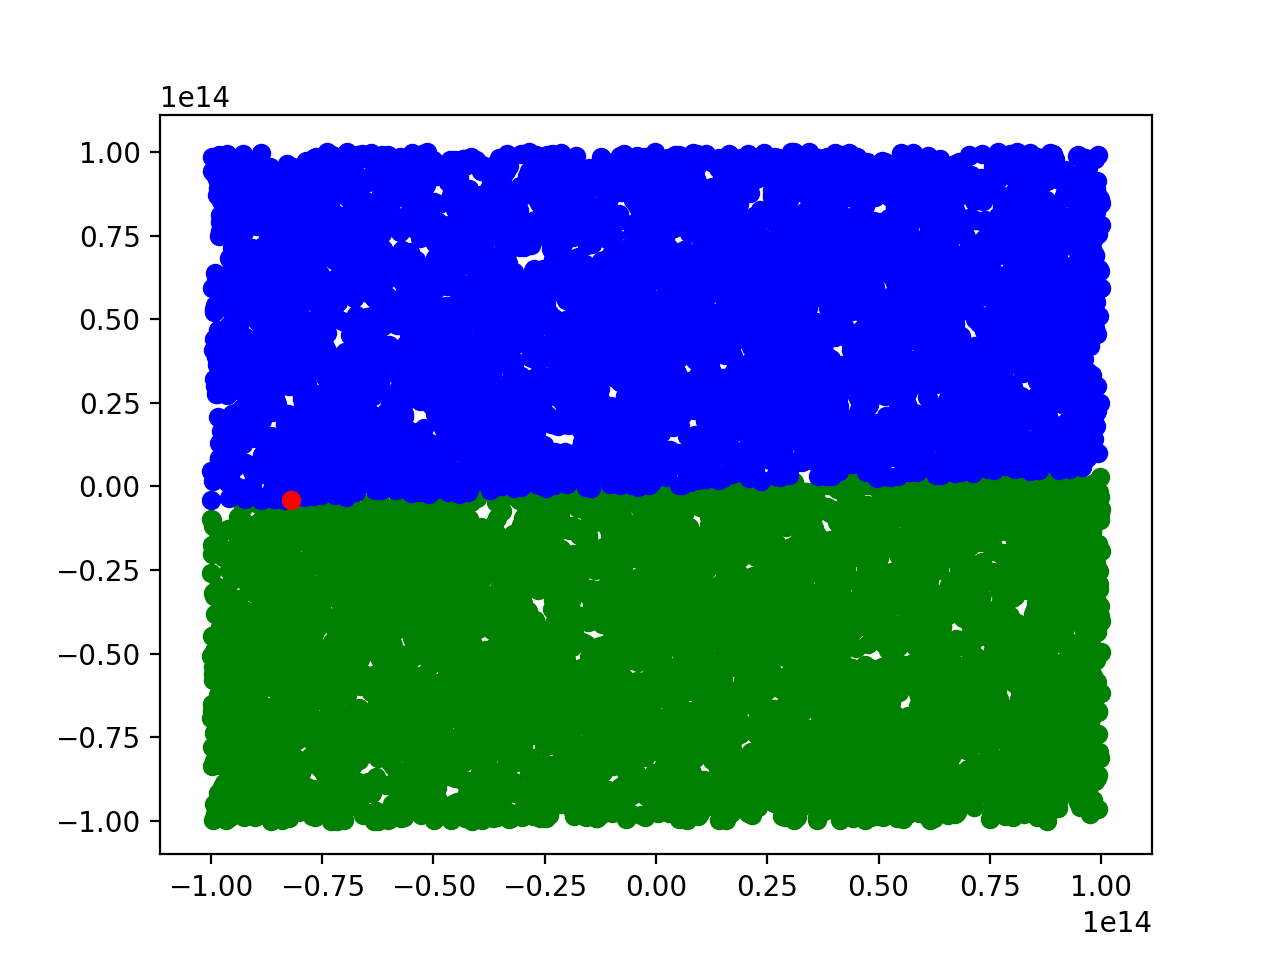

In [33]:
drawComparison(PointsB, 1e-2, 3)

In [42]:
dataComparison(Circle, 1E2)

ε =  1E+01
3x3 B   L:  483  R:  491  In:  26
3x3 M   L:  483  R:  491  In:  26
2x2 B   L:  483  R:  491  In:  26
2x2 M   L:  483  R:  491  In:  26
---
ε =  1E+00
3x3 B   L:  495  R:  503  In:  2
3x3 M   L:  495  R:  503  In:  2
2x2 B   L:  495  R:  503  In:  2
2x2 M   L:  495  R:  503  In:  2
---
ε =  1E-01
3x3 B   L:  496  R:  504  In:  0
3x3 M   L:  496  R:  504  In:  0
2x2 B   L:  496  R:  504  In:  0
2x2 M   L:  496  R:  504  In:  0
---
ε =  1E-02
3x3 B   L:  496  R:  504  In:  0
3x3 M   L:  496  R:  504  In:  0
2x2 B   L:  496  R:  504  In:  0
2x2 M   L:  496  R:  504  In:  0
---
ε =  1E-03
3x3 B   L:  496  R:  504  In:  0
3x3 M   L:  496  R:  504  In:  0
2x2 B   L:  496  R:  504  In:  0
2x2 M   L:  496  R:  504  In:  0
---
ε =  1E-04
3x3 B   L:  496  R:  504  In:  0
3x3 M   L:  496  R:  504  In:  0
2x2 B   L:  496  R:  504  In:  0
2x2 M   L:  496  R:  504  In:  0
---
ε =  1E-05
3x3 B   L:  496  R:  504  In:  0
3x3 M   L:  496  R:  504  In:  0
2x2 B   L:  496  R:  504  In:  0
2x2 

<IPython.core.display.Javascript object>


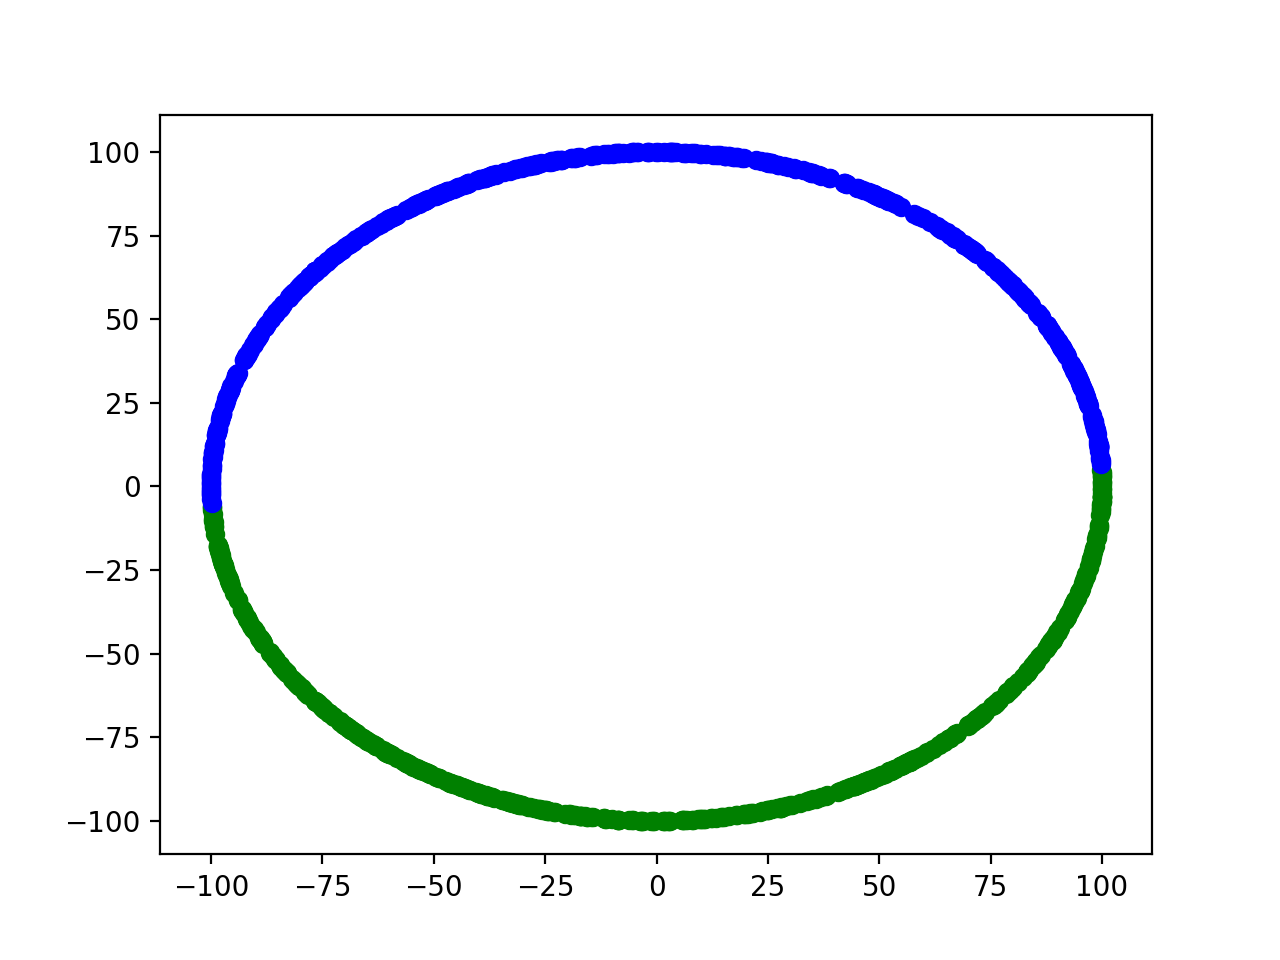

In [38]:
drawComparison(Circle, 1e-2, 0)

In [12]:
dataComparison(Line, 1e-8)

ε =  1E-09
3x3 B   L:  0  R:  0  In:  1000
3x3 M   L:  0  R:  0  In:  1000
2x2 B   L:  0  R:  0  In:  1000
2x2 M   L:  0  R:  0  In:  1000
---
ε =  1E-10
3x3 B   L:  0  R:  0  In:  1000
3x3 M   L:  0  R:  0  In:  1000
2x2 B   L:  0  R:  0  In:  1000
2x2 M   L:  0  R:  0  In:  1000
---
ε =  1E-11
3x3 B   L:  0  R:  0  In:  1000
3x3 M   L:  0  R:  0  In:  1000
2x2 B   L:  0  R:  0  In:  1000
2x2 M   L:  0  R:  0  In:  1000
---
ε =  1E-12
3x3 B   L:  0  R:  0  In:  1000
3x3 M   L:  0  R:  0  In:  1000
2x2 B   L:  116  R:  137  In:  747
2x2 M   L:  67  R:  84  In:  849
---
ε =  1E-13
3x3 B   L:  0  R:  0  In:  1000
3x3 M   L:  0  R:  0  In:  1000
2x2 B   L:  344  R:  368  In:  288
2x2 M   L:  109  R:  137  In:  754
---
ε =  1E-14
3x3 B   L:  96  R:  15  In:  889
3x3 M   L:  0  R:  0  In:  1000
2x2 B   L:  432  R:  453  In:  115
2x2 M   L:  120  R:  147  In:  733
---
ε =  1E-15
3x3 B   L:  405  R:  327  In:  268
3x3 M   L:  360  R:  146  In:  494
2x2 B   L:  471  R:  500  In:  29
2x2 M   L:

<IPython.core.display.Javascript object>


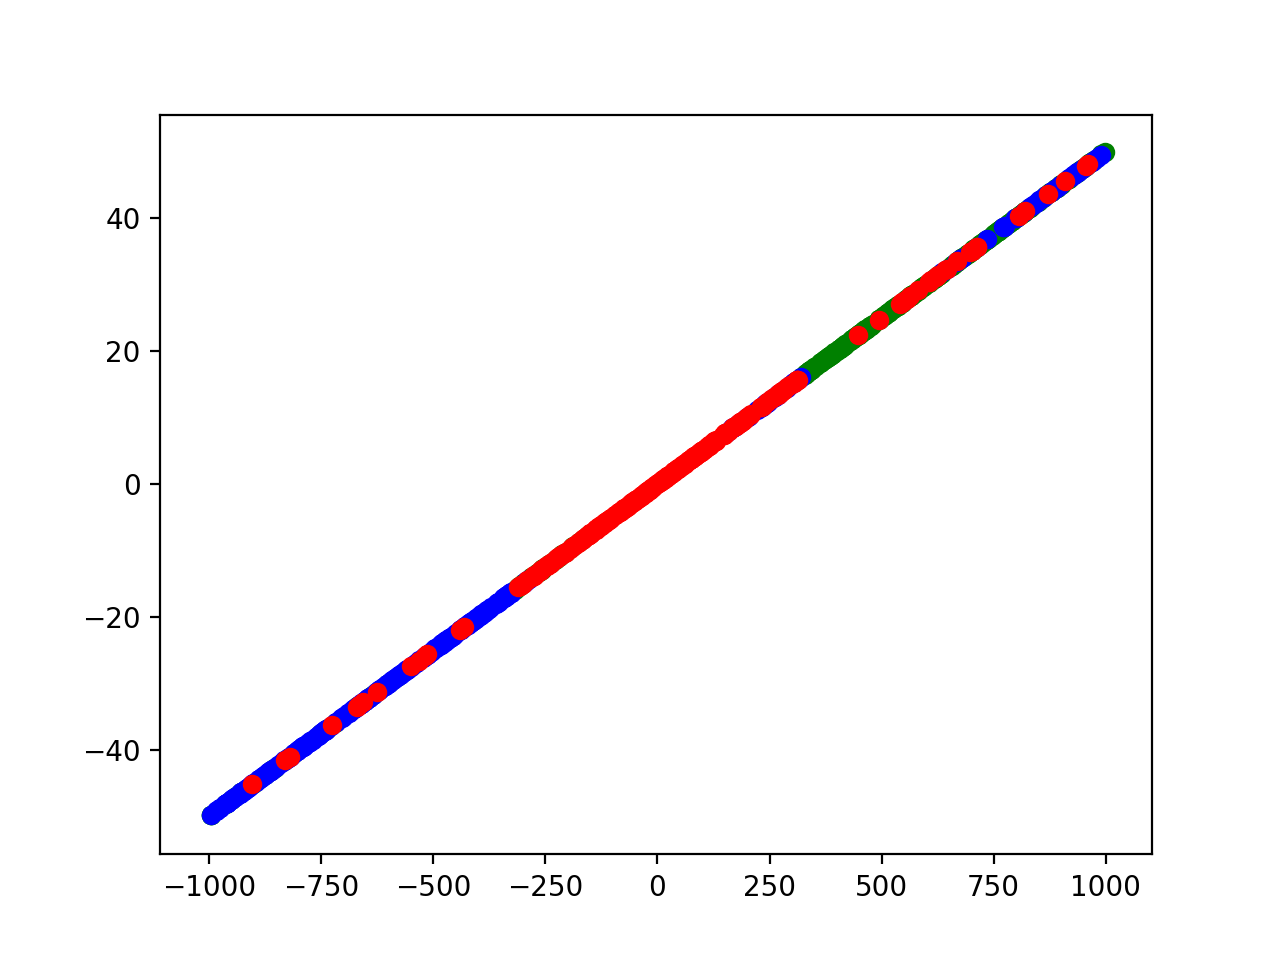

In [13]:
drawComparison(Line, 1e-13, 2)